In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
from dotenv import load_dotenv
load_dotenv()
time_window_seconds = int(os.getenv('TIME_WINDOW_SECONDS', 100))

In [4]:
file_path = "../log/log.txt"

def read_log_file(file_path):
    rows = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) == 4:
                rows.append(parts + [None, None, None])
            elif len(parts) == 6:
                rows.append(parts + [None])
            elif len(parts) == 7:
                rows.append(parts)
    return pd.DataFrame(rows, columns = ['timestamp', 'action', 'game', 'event', 'team', 'player', 'move'])

df_log = read_log_file(file_path)

df_log["timestamp"] = pd.to_datetime(pd.to_numeric(df_log["timestamp"], errors='coerce'), unit='s')

In [5]:
df_log

,timestamp,action,game,event,team,player,move
0,2024-06-23 19:22:13.130542040,ini,juego1,crea-jugador,equipo1,jugador3,None
1,2024-06-23 19:22:13.139543056,fin,juego1,crea-jugador,equipo1,jugador3,None
2,2024-06-23 19:22:17.768582106,ini,juego1,crea-jugador,equipo2,jugador2,None
3,2024-06-23 19:22:17.776597977,fin,juego1,crea-jugador,equipo2,jugador2,None
4,2024-06-23 19:22:23.710598946,ini,juego1,crea-jugador,equipo3,jugador1,None
...,...,...,...,...,...,...,...
159,2024-06-23 22:12:51.419357061,fin,juego7,lanza-dado,equipo1,jugador3,10
160,2024-06-23 22:13:38.253833054,ini,juego7,lanza-dado,equipo2,jugador4,11
161,2024-06-23 22:13:38.255834102,fin,juego7,lanza-dado,equipo2,jugador4,11
162,2024-06-23 22:13:42.443218946,ini,juego7,lanza-dado,equipo2,jugador5,11


In [6]:
# Data para Gráfico 1: Jugadores creador por equipo en un juego.
data_plot1 = df_log[(df_log["action"] == "fin") & 
                    (df_log["event"] == "crea-jugador")]

# Contar la cantidad de jugadores por partida
#df1 = pd.read_excel("ejemplos/ejemplo1.xlsx") # df de ejemplo, usar para verificar congruencia de informacion
df1 = data_plot1.groupby(['game', 'team']).size().reset_index(name='count')
df1

,game,team,count
0,juego1,equipo1,1
1,juego1,equipo2,1
2,juego1,equipo3,1
3,juego2,equipo1,1
4,juego2,equipo2,1
5,juego2,equipo3,1
6,juego3,equipo1,3
7,juego3,equipo2,1
8,juego3,equipo3,1
9,juego4,equipo1,1


Gráfico guardado en: resultados\[1] Cantidad de Jugadores.png


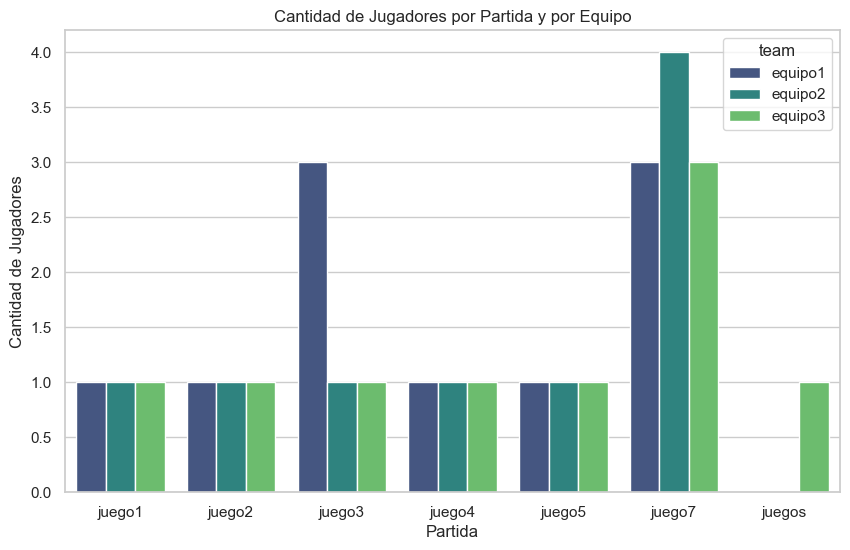

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='game', y='count', hue='team', data=df1, palette='viridis')

plt.title('Cantidad de Jugadores por Partida y por Equipo')
plt.xlabel('Partida')
plt.ylabel('Cantidad de Jugadores')

output_folder = 'resultados'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_path = os.path.join(output_folder, '[1] Cantidad de Jugadores.png')
plt.savefig(output_path)
print(f'Gráfico guardado en: {output_path}')

plt.show()

In [8]:
data_plot2 = df_log[(df_log["event"] == 'lanza-dado') & 
                    (df_log["action"] == 'fin')]

#df2 = pd.read_excel("ejemplos/ejemplo2.xlsx") # ejemplo para verificar congruencia de los datos y el grafico
df2 = data_plot2.groupby(['game', 'player']).size().reset_index(name='count')

Gráfico guardado en: resultados\[2] Cantidad de Jugadas.png


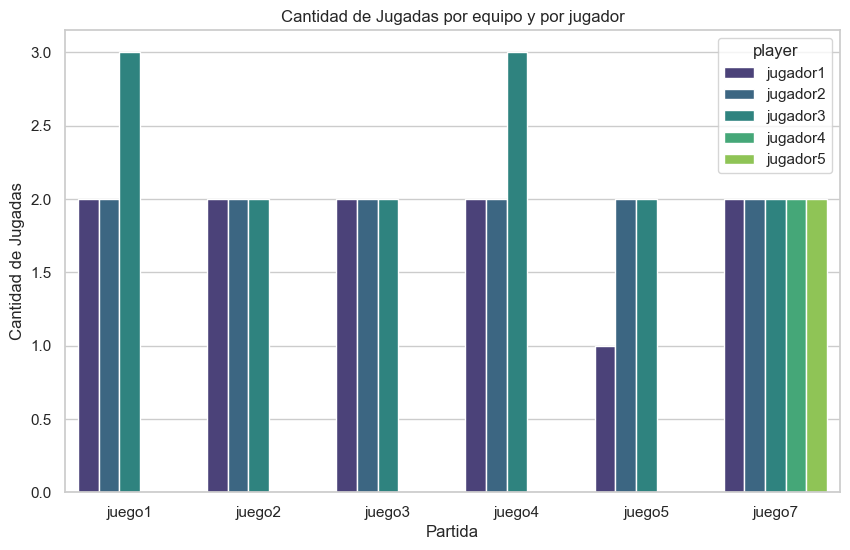

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='game', y='count', hue='player', data=df2, palette='viridis')

plt.title('Cantidad de Jugadas por equipo y por jugador')
plt.xlabel('Partida')
plt.ylabel('Cantidad de Jugadas')

output_folder = 'resultados'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_path = os.path.join(output_folder, '[2] Cantidad de Jugadas.png')
plt.savefig(output_path)
print(f'Gráfico guardado en: {output_path}')

plt.show()

In [10]:
#data_plot3 = pd.read_excel("ejemplos/ejemplo3.xlsx") # usar en caso de test etc
data_plot3 = df_log[(df_log["action"] == 'fin') & 
                    (df_log["event"] == 'lanza-dado')]

start_time = data_plot3["timestamp"].min()
end_time = start_time + pd.Timedelta(seconds=time_window_seconds)
data_plot3 = data_plot3[(data_plot3["timestamp"] >= start_time) & 
                        (data_plot3["timestamp"] <= end_time)]

data_plot3 = data_plot3.sort_values(by = ['game', 'team', "timestamp"])
data_plot3["move"] = pd.to_numeric(data_plot3['move'])
data_plot3['cumulative_score'] = data_plot3.groupby(['game', 'team'])['move'].cumsum()
data_plot3[["timestamp", "game", "team", "cumulative_score"]]

,timestamp,game,team,cumulative_score
9,2024-06-23 19:22:54.580579996,juego1,equipo1,10
15,2024-06-23 19:23:17.408438921,juego1,equipo1,20
23,2024-06-23 19:23:36.632580042,juego1,equipo1,30
11,2024-06-23 19:23:09.194706917,juego1,equipo2,10
18,2024-06-23 19:23:21.492424011,juego1,equipo2,21
13,2024-06-23 19:23:13.377801895,juego1,equipo3,10
21,2024-06-23 19:23:31.565821886,juego1,equipo3,20
39,2024-06-23 19:31:23.447921038,juego2,equipo1,11
44,2024-06-23 19:31:39.173618078,juego2,equipo1,22
35,2024-06-23 19:30:41.380682945,juego2,equipo2,11


In [11]:
def plot_cumulative_score(df, game_name, output_folder):
    df_game = df[df['game'] == game_name]

    df_game['timestamp'] = pd.to_datetime(df_game['timestamp'])

    teams = df_game['team'].unique()
    
    plt.figure(figsize=(14, 7))
    
    for team in teams:
        df_team = df_game[df_game['team'] == team]
        sns.lineplot(x='timestamp', y='cumulative_score', data=df_team, marker='o', label=f'{game_name} - {team}')
    
    plt.xlabel('Tiempo')
    plt.ylabel('Puntaje acumulado')
    plt.title(f'Curvas de puntuación de {game_name}')
    plt.legend()
    plt.grid(True)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_path = os.path.join(output_folder, f'[3] {game_name}.png')
    plt.savefig(output_path)
    plt.close()
    print(f'grafico guardado en: {output_path}')
    
for juego in data_plot3["game"].unique():
    plot_cumulative_score(data_plot3, juego, 'resultados')

grafico guardado en: resultados\[3] juego1.png
grafico guardado en: resultados\[3] juego2.png
grafico guardado en: resultados\[3] juego3.png
grafico guardado en: resultados\[3] juego4.png
grafico guardado en: resultados\[3] juego5.png
grafico guardado en: resultados\[3] juego7.png


In [12]:
data_plot4 = df_log[(df_log["action"] == 'fin') & 
                    (df_log["event"] == 'crea-jugador')]

start_time = data_plot4["timestamp"].min()
end_time = start_time + pd.Timedelta(seconds=time_window_seconds)
data_plot4 = data_plot4[(data_plot4["timestamp"] >= start_time) & 
                        (data_plot4["timestamp"] <= end_time)].sort_values(by = "timestamp").drop_duplicates(subset = ['game', 'team'], keep = 'first')

data_plot4['teams_created'] = data_plot4.groupby('game').cumcount() + 1
data_plot4

,timestamp,action,game,event,team,player,move,teams_created
1,2024-06-23 19:22:13.139543056,fin,juego1,crea-jugador,equipo1,jugador3,None,1
3,2024-06-23 19:22:17.776597977,fin,juego1,crea-jugador,equipo2,jugador2,None,2
5,2024-06-23 19:22:23.719609976,fin,juego1,crea-jugador,equipo3,jugador1,None,3
27,2024-06-23 19:28:08.752301931,fin,juego2,crea-jugador,equipo1,jugador2,None,1
29,2024-06-23 19:28:12.274451971,fin,juego2,crea-jugador,equipo2,jugador3,None,2
31,2024-06-23 19:28:16.164028883,fin,juego2,crea-jugador,equipo3,jugador1,None,3
49,2024-06-23 19:33:15.241517067,fin,juegos,crea-jugador,equipo3,jugador1,None,1
51,2024-06-23 19:33:38.468473911,fin,juego3,crea-jugador,equipo1,jugador1,None,1
57,2024-06-23 19:44:03.487534046,fin,juego3,crea-jugador,equipo2,jugador3,None,2
59,2024-06-23 19:44:08.047296047,fin,juego3,crea-jugador,equipo3,jugador2,None,3


In [13]:
def plot_teams_created(df, game_name, output_folder):
    df_game = df[df['game'] == game_name]

    df_game['timestamp'] = pd.to_datetime(df_game['timestamp'])

    df_game = df_game.sort_values(by='timestamp')

    df_game['teams_created'] = df_game.groupby('game').cumcount() + 1

    plt.figure(figsize=(14, 7))
    sns.lineplot(x='timestamp', y='teams_created', data=df_game, marker='o')
    
    plt.xlabel('Tiempo')
    plt.ylabel('Cantidad de equipos creados')
    plt.title(f'Cantidad de equipos creados en el tiempo para {game_name}')
    plt.grid(True)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_path = os.path.join(output_folder, f'[4] {game_name}.png')
    plt.savefig(output_path)
    plt.close()
    print(f'grafico guardado en: {output_path}')
    
for juego in data_plot4["game"].unique():
    plot_teams_created(data_plot4, juego, 'resultados')

grafico guardado en: resultados\[4] juego1.png
grafico guardado en: resultados\[4] juego2.png
grafico guardado en: resultados\[4] juegos.png
grafico guardado en: resultados\[4] juego3.png
grafico guardado en: resultados\[4] juego4.png
grafico guardado en: resultados\[4] juego5.png
grafico guardado en: resultados\[4] juego7.png


In [14]:
data_plot5 = df_log[(df_log["action"] == 'fin') & 
                    (df_log["event"] == 'crea-jugador')]#

start_time = data_plot5["timestamp"].min()
end_time = start_time + pd.Timedelta(seconds=time_window_seconds)
data_plot5 = data_plot5[(data_plot5["timestamp"] >= start_time) & 
                        (data_plot5["timestamp"] <= end_time)].sort_values(by = ["game", "timestamp"])

data_plot5['players_created'] = data_plot5.groupby('game').cumcount() + 1
data_plot5

,timestamp,action,game,event,team,player,move,players_created
1,2024-06-23 19:22:13.139543056,fin,juego1,crea-jugador,equipo1,jugador3,None,1
3,2024-06-23 19:22:17.776597977,fin,juego1,crea-jugador,equipo2,jugador2,None,2
5,2024-06-23 19:22:23.719609976,fin,juego1,crea-jugador,equipo3,jugador1,None,3
27,2024-06-23 19:28:08.752301931,fin,juego2,crea-jugador,equipo1,jugador2,None,1
29,2024-06-23 19:28:12.274451971,fin,juego2,crea-jugador,equipo2,jugador3,None,2
31,2024-06-23 19:28:16.164028883,fin,juego2,crea-jugador,equipo3,jugador1,None,3
51,2024-06-23 19:33:38.468473911,fin,juego3,crea-jugador,equipo1,jugador1,None,1
53,2024-06-23 19:40:07.129839897,fin,juego3,crea-jugador,equipo1,jugador3,None,2
55,2024-06-23 19:44:00.711797953,fin,juego3,crea-jugador,equipo1,jugador1,None,3
57,2024-06-23 19:44:03.487534046,fin,juego3,crea-jugador,equipo2,jugador3,None,4


In [15]:
def plot_players_created(df, game_name, output_folder):
    df_game = df[df['game'] == game_name]

    df_game['timestamp'] = pd.to_datetime(df_game['timestamp'])

    df_game = df_game.sort_values(by='timestamp')

    df_game['players_created'] = df_game.groupby('game').cumcount() + 1

    plt.figure(figsize=(14, 7))
    sns.lineplot(x='timestamp', y='players_created', data=df_game, marker='o')
    
    plt.xlabel('Tiempo')
    plt.ylabel('Cantidad de jugadores creados')
    plt.title(f'Cantidad de jugadores creados en el tiempo para {game_name}')
    plt.grid(True)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_path = os.path.join(output_folder, f'[5] {game_name}.png')
    plt.savefig(output_path)
    plt.close()
    print(f'grafico guardado en: {output_path}')
    
for juego in data_plot5["game"].unique():
    plot_players_created(data_plot5, juego, 'resultados')

grafico guardado en: resultados\[5] juego1.png
grafico guardado en: resultados\[5] juego2.png
grafico guardado en: resultados\[5] juego3.png
grafico guardado en: resultados\[5] juego4.png
grafico guardado en: resultados\[5] juego5.png
grafico guardado en: resultados\[5] juego7.png
grafico guardado en: resultados\[5] juegos.png
